In [87]:
!pwd

/home/joseph/Workspace/Lectures/kernel


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
path = 'kernel-methods-ammi-2020/'

Xtr = pd.read_csv(path + 'Xtr.csv', index_col=0)
Xte = pd.read_csv(path + 'Xte.csv', index_col=0)
Ytr = pd.read_csv(path + 'Ytr.csv', index_col=0)

Xtr_mat100 = pd.read_csv(path + 'Xtr_mat100.csv', header=None, sep=' ')
Xte_mat100 = pd.read_csv(path + 'Xte_mat100.csv', header=None, sep=' ')

In [3]:
Xtr.seq[0]

'GAGGGGCTGGGGAGGGGGCTGGCCCAGAGGCACCAGACTCTGCAGAACCACCCAGGCATTGTGGGGCTGCCCTGCCACCTGCTGGCCGCTCCTGGTGGCAG'

In [4]:
#!head kernel-methods-ammi-2020/Xtr_mat100.csv

In [5]:
Xtr_mat100

0         1         2         3         4         5         6   \
0     0.010870  0.010870  0.010870  0.032609  0.010870  0.032609  0.010870   
1     0.000000  0.010870  0.021739  0.000000  0.021739  0.021739  0.000000   
2     0.021739  0.000000  0.000000  0.000000  0.043478  0.010870  0.010870   
3     0.000000  0.021739  0.032609  0.000000  0.021739  0.000000  0.032609   
4     0.010870  0.043478  0.000000  0.032609  0.010870  0.010870  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.000000  0.021739  0.010870  0.010870  0.010870  0.000000  0.010870   
1996  0.010870  0.032609  0.000000  0.010870  0.000000  0.043478  0.000000   
1997  0.000000  0.000000  0.000000  0.000000  0.010870  0.000000  0.010870   
1998  0.021739  0.032609  0.000000  0.010870  0.000000  0.010870  0.000000   
1999  0.000000  0.010870  0.000000  0.010870  0.000000  0.000000  0.000000   

           7         8         9   ...        90        91       92        93  \
0     0.00000  0.000000  0.010870  ...  0.021739  0.000000  0.00000  0.000000   
1     0.01087  0.021739  0.010870  ...  0.032609  0.000000  0.00000  0.000000   
2     0.01087  0.000000  0.021739  ...  0.000000  0.010870  0.01087  0.000000   
3     0.01087  0.021739  0.000000  ...  0.010870  0.010870  0.00000  0.000000   
4     0.01087  0.010870  0.000000  ...  0.000000  0.000000  0.01087  0.032609   
...       ...       ...       ...  ...       ...       ...      ...       ...   
1995  0.01087  0.021739  0.000000  ...  0.010870  0.021739  0.01087  0.021739   
1996  0.00000  0.010870  0.021739  ...  0.000000  0.032609  0.00000  0.021739   
1997  0.00000  0.000000  0.000000  ...  0.021739  0.021739  0.00000  0.010870   
1998  0.01087  0.021739  0.010870  ...  0.000000  0.000000  0.00000  0.021739   
1999  0.00000  0.021739  0.010870  ...  0.000000  0.000000  0.00000  0.065217   

            94        95        96        97       98        99  
0     0.010870  0.000000  0.000000  0.021739  0.00000  0.000000  
1     0.000000  0.000000  0.000000  0.054348  0.00000  0.010870  
2     0.000000  0.010870  0.000000  0.021739  0.00000  0.010870  
3     0.000000  0.000000  0.000000  0.010870  0.01087  0.021739  
4     0.021739  0.032609  0.010870  0.010870  0.00000  0.000000  
...        ...       ...       ...       ...      ...       ...  
1995  0.021739  0.010870  0.000000  0.032609  0.01087  0.010870  
1996  0.000000  0.010870  0.000000  0.000000  0.00000  0.010870  
1997  0.010870  0.010870  0.000000  0.010870  0.01087  0.032609  
1998  0.021739  0.021739  0.021739  0.010870  0.00000  0.000000  
1999  0.010870  0.000000  0.000000  0.021739  0.00000  0.010870  

[2000 rows x 100 columns]

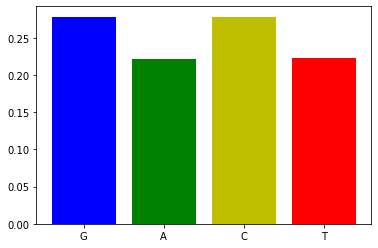

['G', 'A', 'C', 'T']
[0.27837624 0.22162376 0.27761881 0.22238119]


In [6]:
from collections import Counter

my_counter = Counter()

for seq in Xtr.seq:
    my_counter.update(seq)
    
caracters = list(my_counter.keys())
counts    = list(my_counter.values())
dist      = np.array(counts)/sum(counts)

plt.bar(caracters, dist, color='bgyr')
plt.show()

print(caracters)
print(dist)

In [8]:
Xtr.seq[0]

'GAGGGGCTGGGGAGGGGGCTGGCCCAGAGGCACCAGACTCTGCAGAACCACCCAGGCATTGTGGGGCTGCCCTGCCACCTGCTGGCCGCTCCTGGTGGCAG'

In [9]:
Xtr_mat100

0         1         2         3         4         5         6   \
0     0.010870  0.010870  0.010870  0.032609  0.010870  0.032609  0.010870   
1     0.000000  0.010870  0.021739  0.000000  0.021739  0.021739  0.000000   
2     0.021739  0.000000  0.000000  0.000000  0.043478  0.010870  0.010870   
3     0.000000  0.021739  0.032609  0.000000  0.021739  0.000000  0.032609   
4     0.010870  0.043478  0.000000  0.032609  0.010870  0.010870  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.000000  0.021739  0.010870  0.010870  0.010870  0.000000  0.010870   
1996  0.010870  0.032609  0.000000  0.010870  0.000000  0.043478  0.000000   
1997  0.000000  0.000000  0.000000  0.000000  0.010870  0.000000  0.010870   
1998  0.021739  0.032609  0.000000  0.010870  0.000000  0.010870  0.000000   
1999  0.000000  0.010870  0.000000  0.010870  0.000000  0.000000  0.000000   

           7         8         9   ...        90        91       92        93  \
0     0.00000  0.000000  0.010870  ...  0.021739  0.000000  0.00000  0.000000   
1     0.01087  0.021739  0.010870  ...  0.032609  0.000000  0.00000  0.000000   
2     0.01087  0.000000  0.021739  ...  0.000000  0.010870  0.01087  0.000000   
3     0.01087  0.021739  0.000000  ...  0.010870  0.010870  0.00000  0.000000   
4     0.01087  0.010870  0.000000  ...  0.000000  0.000000  0.01087  0.032609   
...       ...       ...       ...  ...       ...       ...      ...       ...   
1995  0.01087  0.021739  0.000000  ...  0.010870  0.021739  0.01087  0.021739   
1996  0.00000  0.010870  0.021739  ...  0.000000  0.032609  0.00000  0.021739   
1997  0.00000  0.000000  0.000000  ...  0.021739  0.021739  0.00000  0.010870   
1998  0.01087  0.021739  0.010870  ...  0.000000  0.000000  0.00000  0.021739   
1999  0.00000  0.021739  0.010870  ...  0.000000  0.000000  0.00000  0.065217   

            94        95        96        97       98        99  
0     0.010870  0.000000  0.000000  0.021739  0.00000  0.000000  
1     0.000000  0.000000  0.000000  0.054348  0.00000  0.010870  
2     0.000000  0.010870  0.000000  0.021739  0.00000  0.010870  
3     0.000000  0.000000  0.000000  0.010870  0.01087  0.021739  
4     0.021739  0.032609  0.010870  0.010870  0.00000  0.000000  
...        ...       ...       ...       ...      ...       ...  
1995  0.021739  0.010870  0.000000  0.032609  0.01087  0.010870  
1996  0.000000  0.010870  0.000000  0.000000  0.00000  0.010870  
1997  0.010870  0.010870  0.000000  0.010870  0.01087  0.032609  
1998  0.021739  0.021739  0.021739  0.010870  0.00000  0.000000  
1999  0.010870  0.000000  0.000000  0.021739  0.00000  0.010870  

[2000 rows x 100 columns]

In [10]:
Xtr_mat100.shape

(2000, 100)

In [11]:
Ytr.Bound.value_counts()

0    1002
1     998
Name: Bound, dtype: int64

In [12]:
Xte.seq.str.len().value_counts()

101    1000
Name: seq, dtype: int64

In [13]:
Ytr

Bound
Id         
0         1
1         0
2         1
3         0
4         1
...     ...
1995      1
1996      0
1997      1
1998      1
1999      1

[2000 rows x 1 columns]

In [83]:
from sklearn.model_selection import train_test_split

# X_feat_eng = np.concatenate([
#     Xtr_mat100.values,
#     Xtr_mat100.values**2], axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    Xtr_mat100.values, Ytr.Bound.values,
    test_size=0.33, random_state=1)

In [228]:
from sklearn.utils.fixes import loguniform

param_grid = {'C': loguniform(1e-3, 1e3),
                #'gamma': loguniform(1e-4, 1e-3),
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'class_weight':['balanced', None]}

ImportError: cannot import name 'loguniform' from 'sklearn.utils.fixes' (/home/joseph/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py)

In [15]:
!grep -c ^processor /proc/cpuinfo 

8


In [88]:
%%time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm

clf = RandomizedSearchCV(svm.SVC(), param_grid, n_iter=100, n_jobs=-1)#, cv=5)
clf.fit(X_train, y_train)

CPU times: user 2.1 s, sys: 123 ms, total: 2.22 s
Wall time: 33 s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5524230f10>,
                                        'class_weight': ['balanced', None],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=N

In [89]:
from sklearn.metrics import classification_report

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in sorted(zip(means, stds, clf.cv_results_['params']), key=lambda x: -x[0]):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'C': 0.5198318208425673, 'class_weight': None, 'kernel': 'poly'}

Grid scores on development set:

0.484 (+/-0.003) for {'C': 0.005934272433281592, 'class_weight': 'balanced', 'kernel': 'rbf'}
0.484 (+/-0.006) for {'C': 0.0010081000883201655, 'class_weight': 'balanced', 'kernel': 'poly'}
0.485 (+/-0.007) for {'C': 0.003074239344072023, 'class_weight': 'balanced', 'kernel': 'poly'}
0.486 (+/-0.014) for {'C': 0.008511141943582089, 'class_weight': 'balanced', 'kernel': 'poly'}
0.487 (+/-0.016) for {'C': 0.00892054413403783, 'class_weight': 'balanced', 'kernel': 'poly'}
0.487 (+/-0.019) for {'C': 0.01057548588799171, 'class_weight': 'balanced', 'kernel': 'poly'}
0.492 (+/-0.027) for {'C': 0.002808819504601906, 'class_weight': 'balanced', 'kernel': 'rbf'}
0.492 (+/-0.027) for {'C': 0.7644183383215623, 'class_weight': 'balanced', 'kernel': 'linear'}
0.492 (+/-0.027) for {'C': 0.2355989971770427, 'class_weight': 'balanced', 'kernel': 'linear'}
0

In [72]:
clf.cv_results_

{'mean_fit_time': array([0.17886524, 0.16948423, 0.11039114, 0.12800722, 0.19617324,
        0.19117908, 0.17007875, 0.19511752, 0.16582537, 0.12809353]),
 'std_fit_time': array([0.00097918, 0.00458915, 0.00510767, 0.00023764, 0.00060317,
        0.00094036, 0.00816509, 0.00100041, 0.00063915, 0.0010029 ]),
 'mean_score_time': array([0.04113131, 0.03806977, 0.02212276, 0.02860651, 0.03603621,
        0.04215145, 0.02599139, 0.0358582 , 0.0260735 , 0.0268085 ]),
 'std_score_time': array([3.88272760e-04, 2.02509692e-03, 3.53081369e-04, 5.99038435e-05,
        2.03998125e-04, 1.37494488e-04, 1.86410362e-04, 2.59309746e-04,
        2.29543207e-04, 2.34499866e-04]),
 'param_C': masked_array(data=[0.028480606144497662, 0.469032391338509,
                    64.10992042746764, 0.021415135963743247,
                    12.636363745749804, 0.0016577837333544773,
                    4.3839677759071805, 16.00930390888419,
                    3.6602565771152875, 15.966106719203246],
              

# Define our Estimator

In [84]:
import sklearn

# for sklearn compatibilty use:
# class RidgeClassifier(sklearn.base.BaseEstimator):

class RidgeClassifier():
    def __init__(self, lamb=0.1):
        self.beta = None
        self.lamb = lamb

    def fit(self, X, y):
        #maximum likehood estimator
        n = X.shape[1]
        I = np.eye(n)
        self.beta = np.linalg.inv(X.T @ X + self.lamb*I) @ X.T @ y
        return self.beta

    def predict(self, X):
        output = X @ self.beta

        y_pred = np.zeros_like(output)
        y_pred[ output <  0.5 ] = 0
        y_pred[ output >= 0.5 ] = 1

        return y_pred
    
    def score(self, X, y):
        pred = self.predict(X)
        accuracy = accuracy_score(pred, y)
        return accuracy
    
    ### For sklearn compatibility
    def get_params(self, deep=True):
        return {'lamb':self.lamb}

    ### For sklearn compatibility
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

def accuracy_score(y_pred, y_true):
    score = np.mean(y_pred == y_true)
    return score

# Cross validation (using sklearn)

In [85]:
from sklearn.model_selection import cross_val_score
clf = RidgeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.60820896, 0.59328358, 0.56343284, 0.54104478, 0.59701493])

# Cross validation + HyperParameter search

In [86]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

#from sklearn.utils.fixes import loguniform
#from scipy.stats import loguniform
#from sklearn.utils.fixes import loguniform
#from scipy.stats import expon

# tuned_parameters = [{'lamb': expon(scale=100)}]
# tuned_parameters = [{'lamb': loguniform(1e-4, 1e3)}]
tuned_parameters = [{'lamb': [1, 0.1, 0.01, 0.001]}]

clf = GridSearchCV(RidgeClassifier(),
                         tuned_parameters, #n_iter = 10,
                         n_jobs = -1,
                         cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_val, clf.predict(X_val)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'lamb': 0.1}

Grid scores on development set:

0.510 (+/-0.027) for {'lamb': 1}
0.581 (+/-0.049) for {'lamb': 0.1}
0.575 (+/-0.037) for {'lamb': 0.01}
0.577 (+/-0.030) for {'lamb': 0.001}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.62      0.58      0.60       336
           1       0.59      0.64      0.62       324

    accuracy                           0.61       660
   macro avg       0.61      0.61      0.61       660
weighted avg       0.61      0.61      0.61       660




## Bayesian optimization

In [98]:
#!python -m pip install bayesian-optimization > /dev/null

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def sample_score(**kwargs):
    # Sample lambd on the log-uniform scale
    lambd = kwargs['lambd']
    sigma = kwargs['sigma']
    #model = LogisticRegression(C=10**kwargs['C'], solver='lbfgs', max_iter=1000)
    #model = RidgeClassifier(lambd=10**lambd, kernel=current_kernel, **kwargs)#sigma=sigma) #, random_state=12345)
    model = SVC(kernel=current_kernel, C=10**lambd, gamma=sigma, random_state=42)#, degree=kwargs['power'], coef0=0.0)
    
    # Sample parameters on a log scale
    score = cross_val_score(model,
                         X=X_train,
                         y=y_train,
                         #scoring='roc_auc',
                         cv=5).mean()
    #print(f'lambd={lambd:.02e}, score={score:.02f}')
    return score

In [100]:
from bayes_opt import BayesianOptimization

current_kernel = 'rbf' # 'rbf' 'linear' 'quadratic'
pbounds = {'lambd': (1, -15), 'sigma': (4, 20)}#, 'power':(1,10)} #, 'sigma': (5, 10)}
#pbounds = {'C': (100, ), 'degree':(1,10)} #, 'coef0': (0)
#pbounds = {'C': (2, -2)}

optimizer = BayesianOptimization(
    f=sample_score,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

In [ ]:
optimizer.maximize(n_iter=10, acq="ucb", kappa=0.1)

|   iter    |  target   |   lambd   |   sigma   |
-------------------------------------------------
|  1        |  0.5157   | -5.672    |  15.53    |
|  2        |  0.506    |  0.9982   |  8.837    |
|  3        |  0.5157   | -1.348    |  5.477    |
|  4        |  0.5157   | -1.98     |  9.529    |
|  5        |  0.5157   | -5.348    |  12.62    |
|  6        |  0.5157   | -15.0     |  12.61    |
|  7        |  0.5157   | -15.0     |  9.051    |
|  8        |  0.5157   | -15.0     |  4.55     |
|  9        |  0.5157   | -15.0     |  16.7     |
|  10       |  0.5157   | -15.0     |  13.16    |


In [448]:
def plot_bo(bo):
    x = np.linspace(0, -10, 10000)
    mean, sigma = bo._gp.predict(x.reshape(-1, 1), return_std=True)
    
    plt.figure(figsize=(16, 9))
    #plt.plot(x, f(x))
    plt.plot(10**x, mean)
    plt.xscale("log")
    plt.fill_between(10**x, mean + sigma, mean - sigma, alpha=0.1)
    plt.scatter(bo.space.params.flatten(), bo.space.target, c="red", s=50, zorder=10)
    plt.show()

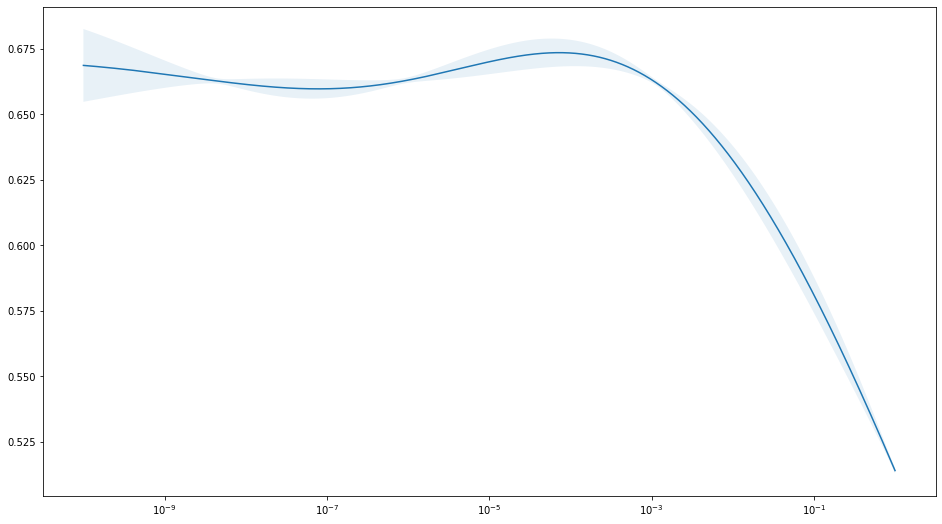

In [449]:
plot_bo(optimizer)

# Cross validation + HyperParameter search

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

tuned_parameters = [{'lambd': [1, 0.3, 0.1, 0.03, 0.01, 0.001]}]

clf = GridSearchCV(RidgeClassifier(),
                         tuned_parameters, #n_iter = 10,
                         n_jobs = -1,
                         cv=5)
clf.fit(X_train, y_train)

# On the full dataset
# clf.fit(Xtr_mat100.values, Ytr.Bound.values)

## Results

In [ ]:
from sklearn.metrics import classification_report

print("Best parameters set found on development set:\n")
print(clf.best_params_)

print("\nGrid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(mean, std * 2, params))
print()

print("Detailed classification report:")
y_true, y_pred = y_val, clf.predict(X_val)
print(classification_report(y_true, y_pred))

In [66]:
val_acc = clf.score(X_val, y_val)

print('Validation: {:.0f}%'.format(val_acc*100))

Validation: 57%


# Train Model

In [81]:
clf = RidgeClassifier()

clf.fit(X_train, y_train)

acc_train = clf.score(X_train, y_train)
acc_val   = clf.score(X_val,   y_val)

f'Accuracy: Train {acc_train}, Valid {acc_val}'

'Accuracy: Train 0.6485074626865671, Valid 0.6121212121212121'

In [75]:
#train
beta = train(X_train, y_train) 

#predict
y_pred = predict(beta, X_train)

#evaluation
accuracy = accuracy_score(y_pred, y_train)

print('Train accuracy {:.2f}%'.format(accuracy*100))

Train accuracy 64.85%


In [76]:
output = X_val @ beta

y_pred = np.zeros_like(output)
y_pred[ output <  0.5 ] = 0
y_pred[ output >= 0.5 ] = 1

accuracy = np.mean(y_pred == y_val)
print('Valid accuracy {:.2f}%'.format(accuracy*100))

Valid accuracy 60.91%


In [68]:
#X_val_centered = (X_val - mu)/std

output = X_val @ beta

for i in range(0, 20):
    thres = i/20.
    
    y_pred = np.zeros_like(output)
    y_pred[ output >= thres ] = 1
    
    accuracy = np.mean(y_pred == y_val)
    
    print('Thres {}, accuracy {:.2f}%'.format(thres, accuracy*100))

# thres_log.append(thres)
# acc_log.append(accuracy)
# thres_log = []
# acc_log = []
# plt.plot(thres_log, acc_log)
# plt.show()

Thres 0.0, accuracy 49.09%
Thres 0.05, accuracy 49.09%
Thres 0.1, accuracy 49.09%
Thres 0.15, accuracy 49.24%
Thres 0.2, accuracy 49.70%
Thres 0.25, accuracy 50.76%
Thres 0.3, accuracy 53.79%
Thres 0.35, accuracy 56.06%
Thres 0.4, accuracy 56.67%
Thres 0.45, accuracy 60.15%
Thres 0.5, accuracy 60.91%
Thres 0.55, accuracy 62.12%
Thres 0.6, accuracy 58.18%
Thres 0.65, accuracy 56.97%
Thres 0.7, accuracy 52.88%
Thres 0.75, accuracy 51.97%
Thres 0.8, accuracy 51.36%
Thres 0.85, accuracy 51.06%
Thres 0.9, accuracy 50.91%
Thres 0.95, accuracy 50.91%


In [25]:
output = Xte_mat100.values @ beta

y_pred = np.zeros_like(output, dtype=int)
y_pred[ output <  0.6 ] = 0
y_pred[ output >= 0.6 ] = 1

# for submission ===============================
y_pred

submission = pd.DataFrame({'Bound': y_pred})
submission.index.name = 'Id'
submission

Bound
Id        
0        1
1        0
2        0
3        1
4        0
..     ...
995      1
996      1
997      0
998      1
999      0

[1000 rows x 1 columns]

In [26]:
submission.to_csv('submisson.csv')

# What if we do everything inside functions

In [134]:
#Now everything inside functions

#step1
def preprocessing(X):
    mu  = X.mean(axis=0)
    std = X.std(axis=0)
    X_centered = (X-mu)/std
    return X_centered, mu, std 

#step2
def train(X,y):
    #maximum likehood estimator
    beta = np.linalg.inv(X.T @ X) @ X.T @ y_train
    return beta

#step3
def predict(beta, X, thres=0.5):
    output = X @ beta
    
    #apply threshold
    pred = np.zeros_like(output)
    pred[ output >= thres ] = 1
    return pred

#step4
def accuracy_score(y_pred, y_true):
    accuracy = np.mean(y_pred == y_true)
    return accuracy

## is not nice!!!

In [135]:
#Step1 : preprocessing
X_centered, mu, std = preprocessing(X_train)

#Step 2 : train
beta = train(X_centered,y_train)

#Step3 : predict
y_pred = predict(beta, X, thres=0.2)

#Step4 : Evaluation
accuracy = accuracy_score(y_pred,y_train)

#Result
print('Accuracy {:.2f}%'.format(accuracy*100))

Accuracy 52.69%


# Now everything inside  a class

In [136]:
#Now everything inside  a class

class MaximumLikelihood():
    def __init__(self):
        self.beta = None
        
    #step1
    def preprocessing(self, X):
        self.mu  = X.mean(axis=0)
        self.std = X.std(axis=0)
        X_centered = (X-mu)/std
        return X_centered, mu, std 

    #step2
    def train(self, X,y):
        self.preprocessing(X)
        
        #maximum likehood estimator
        X = (X-self.mu)/self.std
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y_train

    #step3
    def predict(self, X, thres=0.5):
        X_centered = (X-self.mu)/self.std
        
        output = X @ self.beta

        #apply threshold
        pred = np.zeros_like(output)
        pred[ output >= thres ] = 1
        return pred

    #step4
    def score(self, X,y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y_pred, y)
        return accuracy

# Simpler

In [12]:
#import MaximumLikelihood

model = RidgeClassifier()

model.train(X_train,y_train)

train_acc = model.score(X_train, y_train)
val_acc   = model.score(X_val, y_val)

#Result
print(f'Accuracy train: {train_acc}, valid: {val_acc}')

AttributeError: 'RidgeClassifier' object has no attribute 'score'

# With SkLearn

In [13]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

train_acc = clf.score(X_train, y_train)
val_acc = clf.score(X_val, y_val)

print(f'Accuracy train: {train_acc}, valid: {val_acc}')

/home/joseph/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy train: 0.5029850746268657, valid: 0.4909090909090909


In [129]:
#C=55, gamma='scale'

In [93]:
pred = clf.predict(Xte_mat100.to_numpy())
submission = pd.DataFrame({'Bound': pred})
submission.index.name = 'Id'
submission

Bound
Id        
0        1
1        0
2        0
3        0
4        0
..     ...
995      1
996      0
997      0
998      1
999      0

[1000 rows x 1 columns]

In [ ]:
submission.to_csv('submisson.csv')

In [35]:
# !mkdir ~/.kaggle/
# !echo '{"username":"jdomguia","key":"4b8e8e86c7b89252ce1d7d4e6240213e"}' > ~/.kaggle/kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/home/joseph/.kaggle/’: File exists


In [36]:
#!kaggle competitions download -c kernel-methods-ammi-2020

In [29]:
# !kaggle competitions submit -c kernel-methods-ammi-2020 -f 'submisson.csv' -m 'max likehood on Xmat100'

100%|██████████| 5.76k/5.76k [00:04<00:00, 1.25kB/s]
Successfully submitted to Kernel Methods AMMI 2020

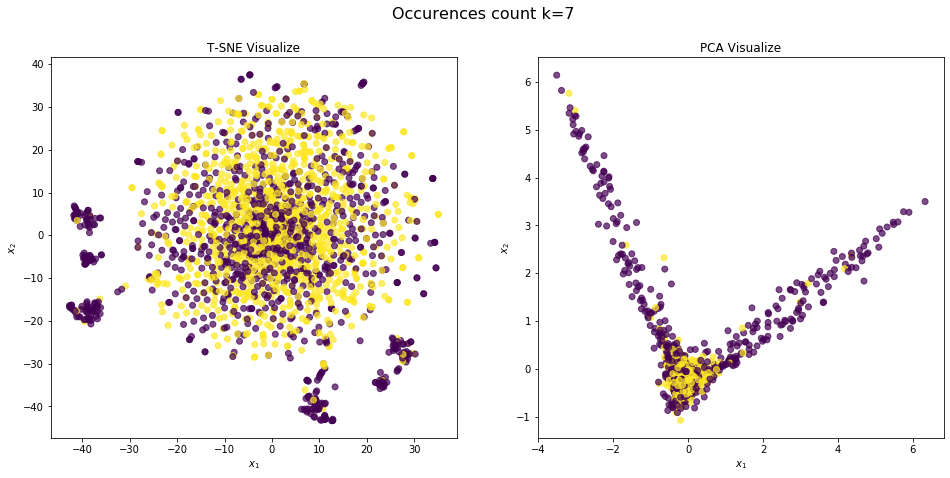

In [31]:
visualize_data(X_reduced, Ytr.Bound, f'Occurences count k={7}')

In [23]:
type(Xtr_occurences)

numpy.ndarray

In [53]:
isinstance(Xtr_occurences, sp.spmatrix)

True

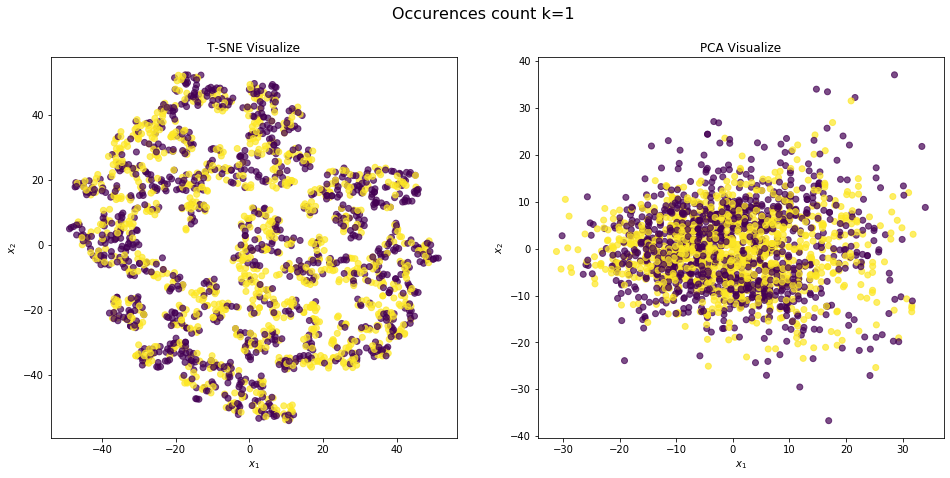

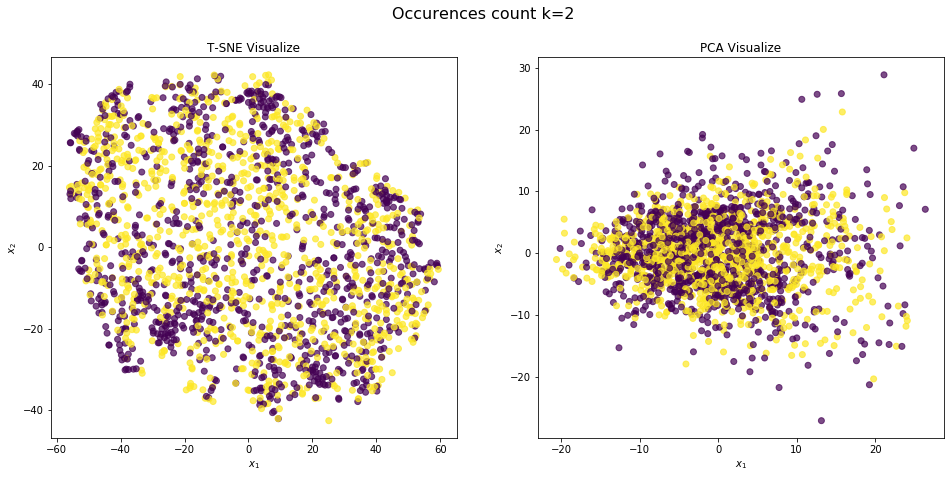

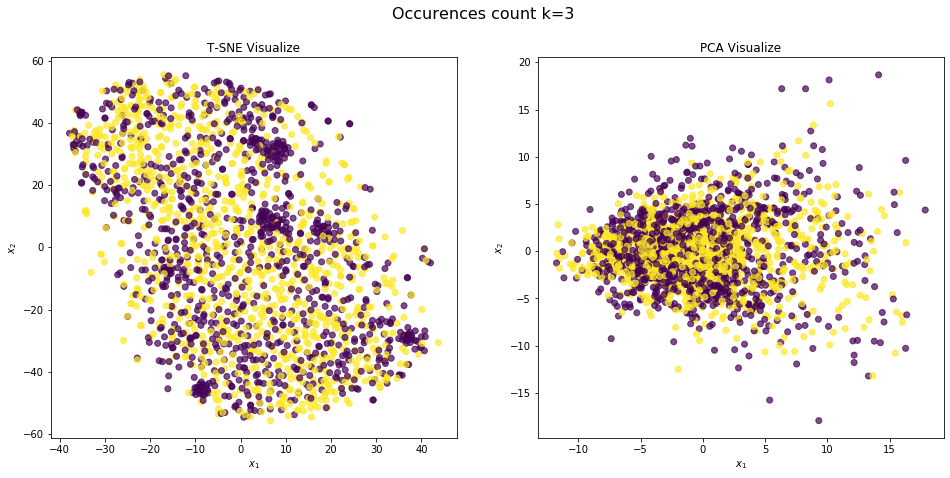

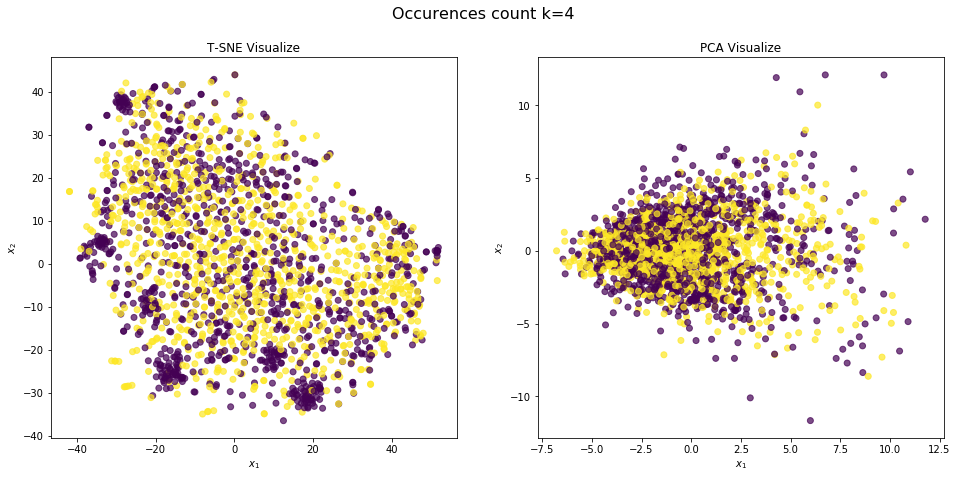

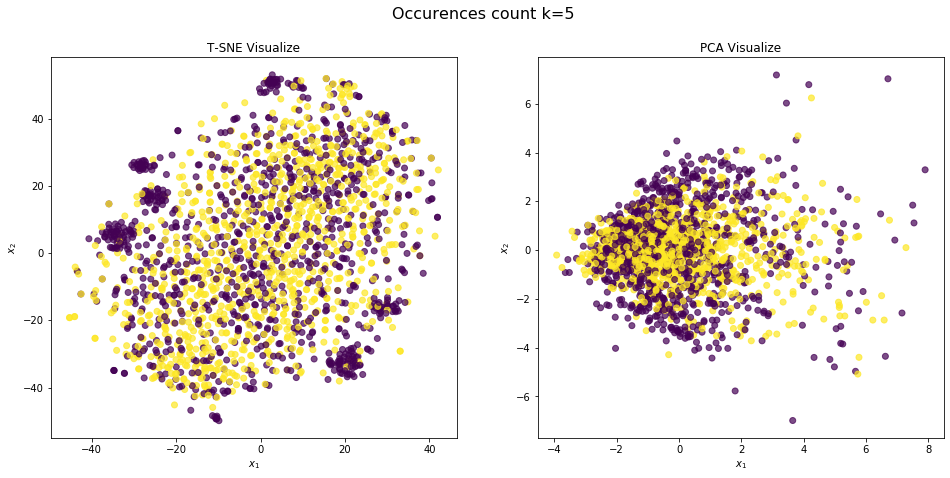

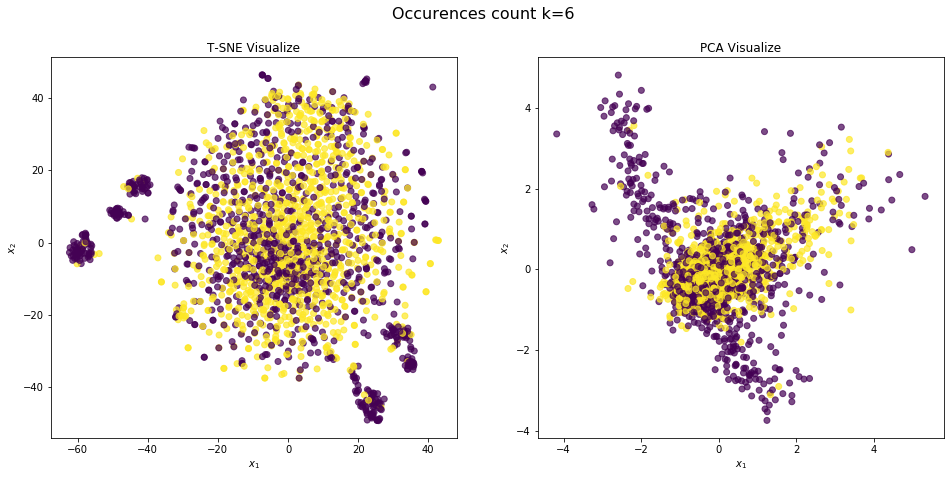

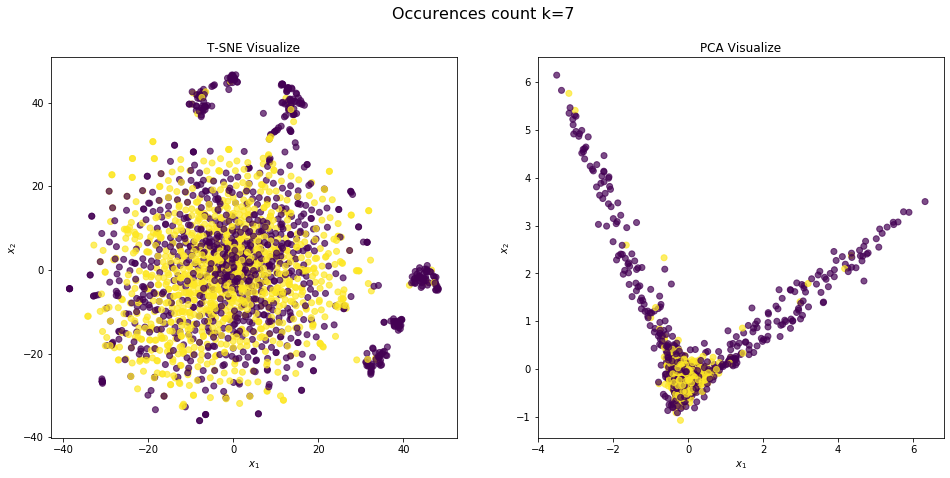

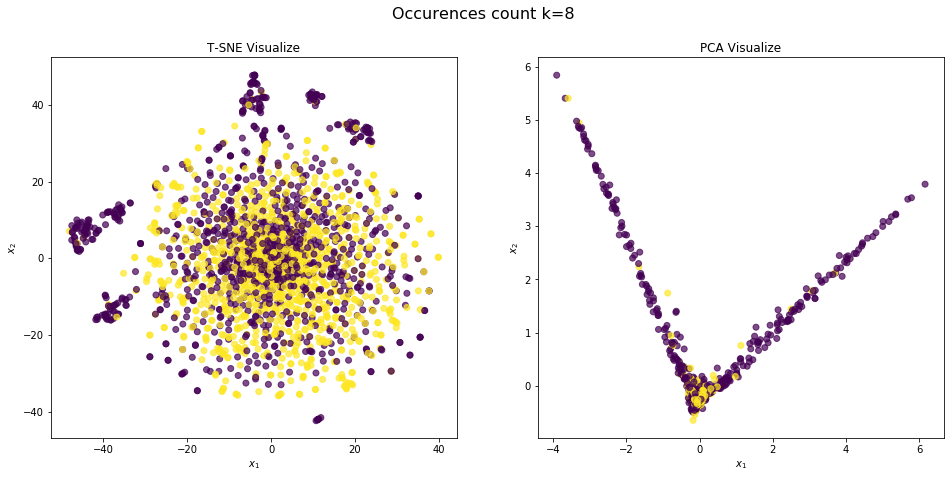

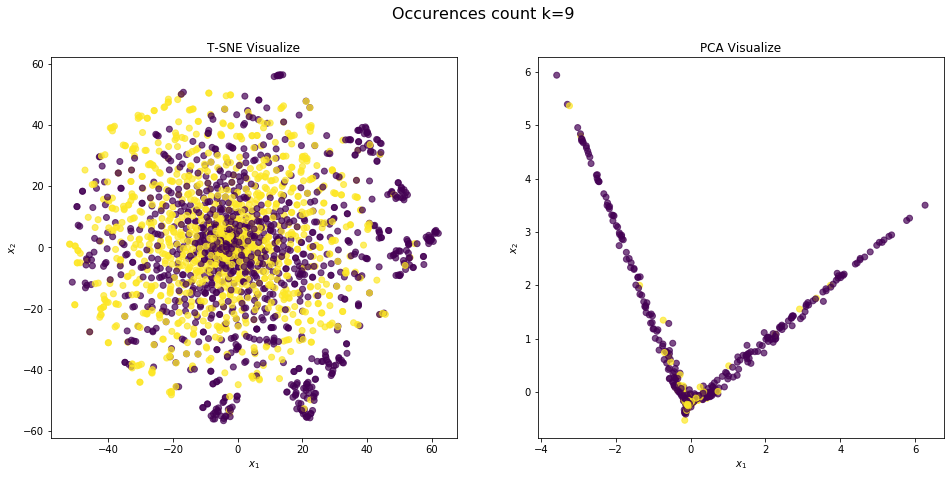

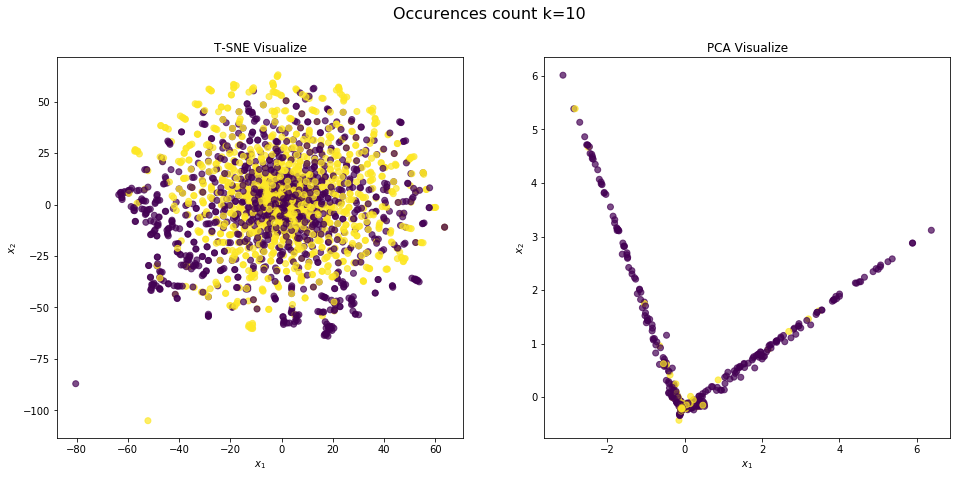

MemoryError: Unable to allocate array with shape (4194304, 400) and data type float64

In [54]:
for k in range(1,14):
    Xtr_occurences = encode_data(Xtr.seq, encoder=count_occurences, word_len_list=[k], sparse=True, verbose=0, missmatch=0)
    Xtr_occurences = dim_reduction(Xtr_occurences)
    if isinstance(Xtr_occurences, sp.spmatrix):
        Xtr_occurences = Xtr_occurences.toarray()
    visualize_data(Xtr_occurences, Ytr.Bound, f'Occurences count k={k}')

/home/joseph/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning:

invalid value encountered in true_divide



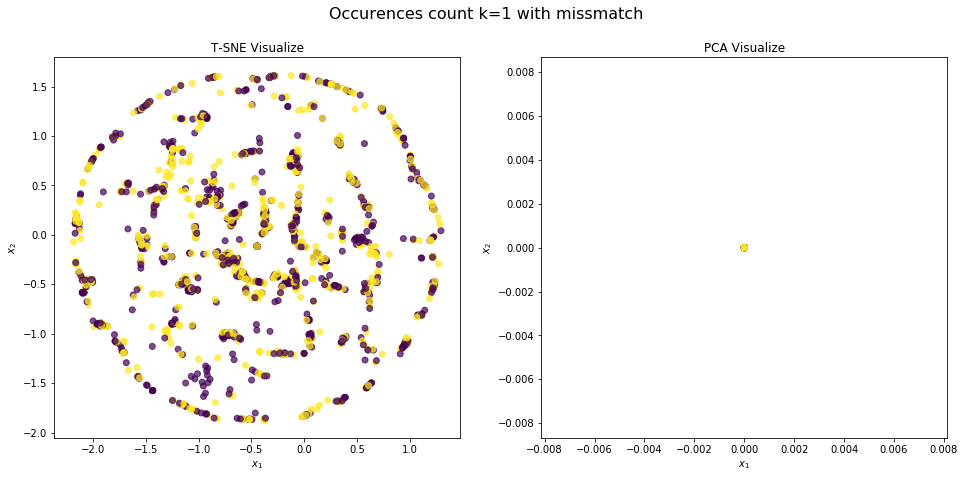

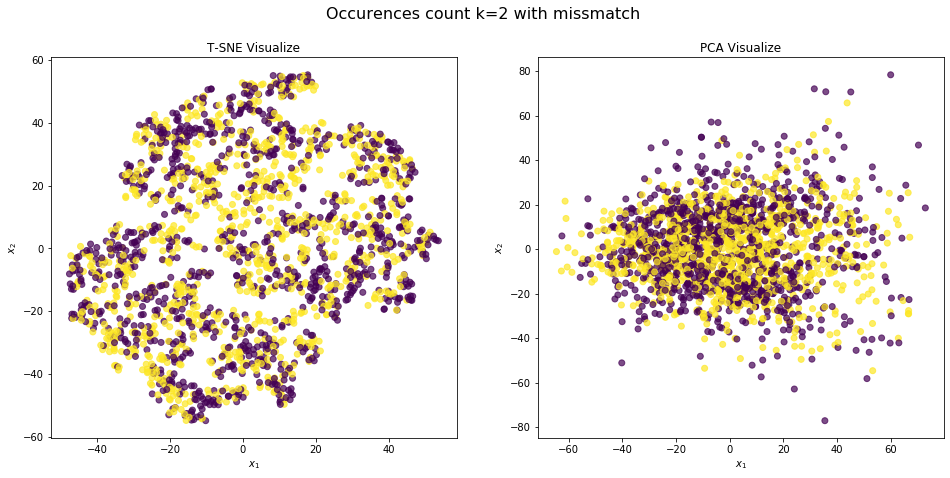

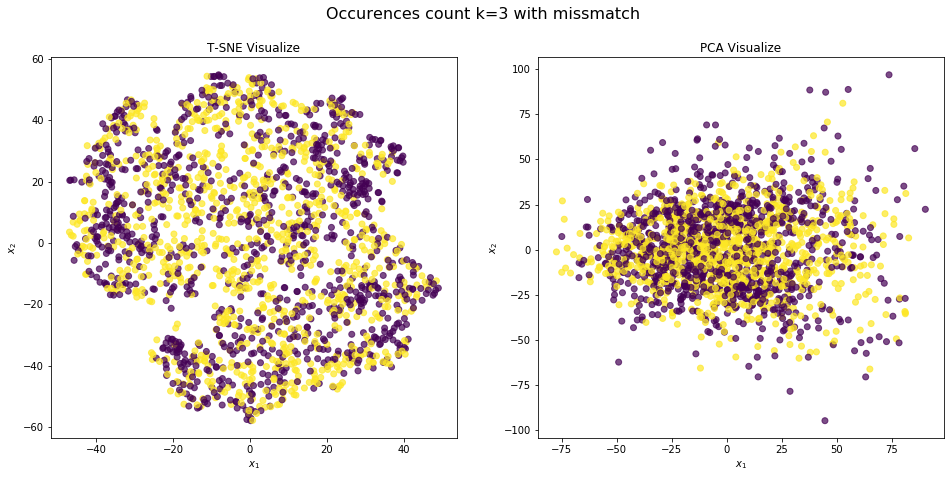

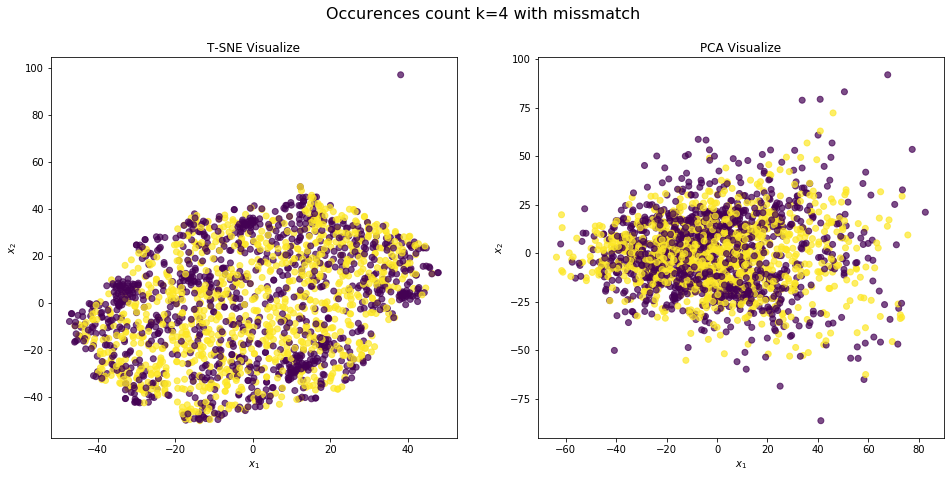

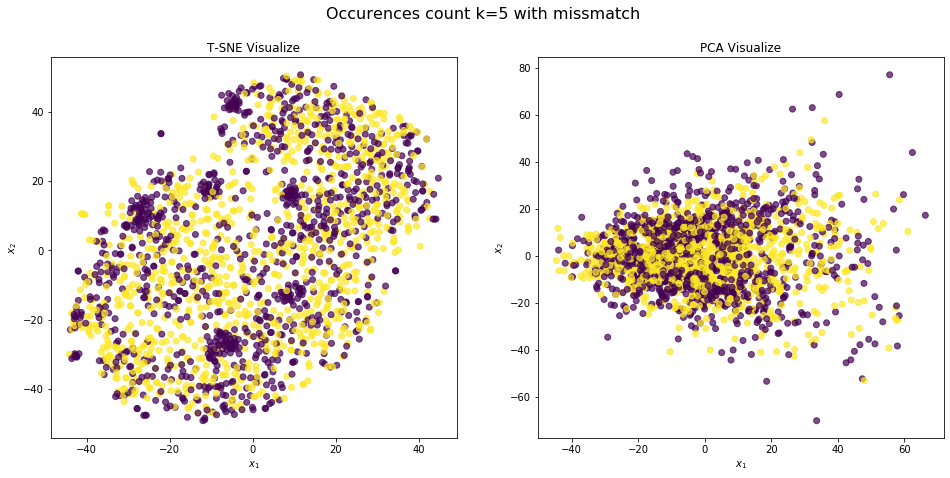

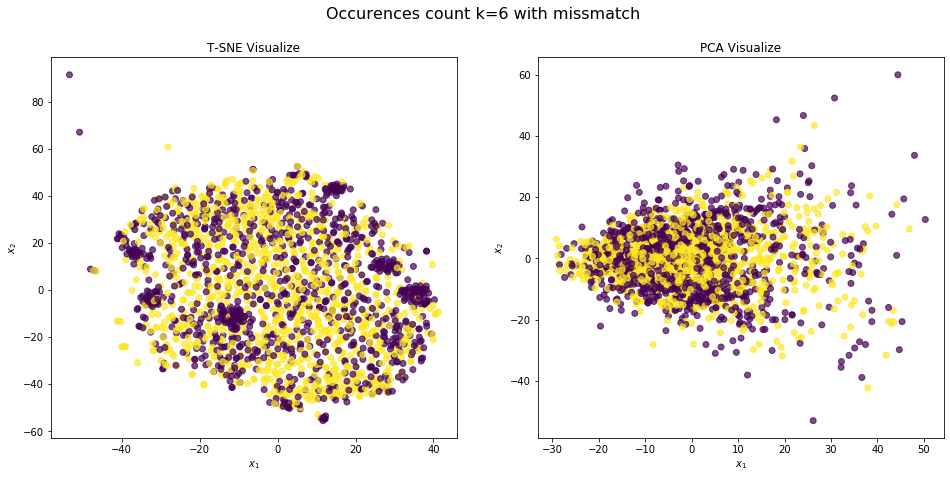

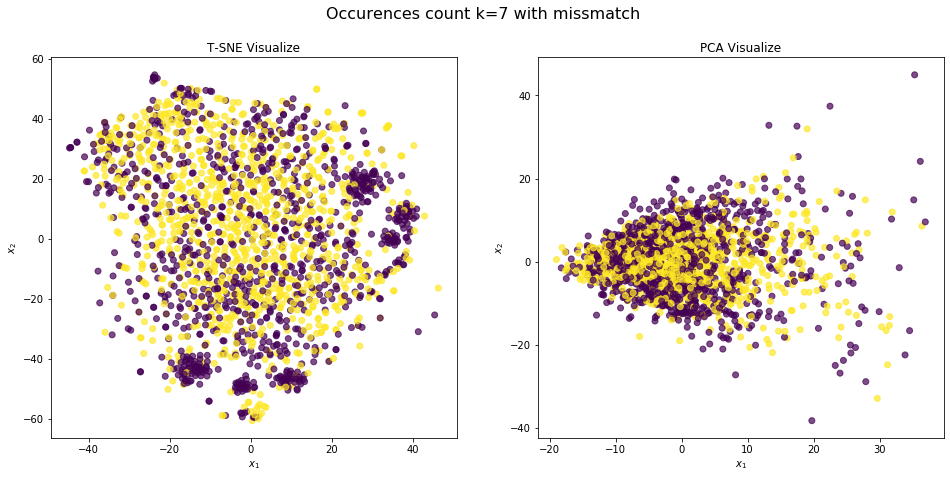

In [16]:
for k in range(1,8):
    Xtr_occurences = encode_data(Xtr.seq, encoder=count_occurences, word_len_list=[k], verbose=0, missmatch=1)
    visualize_data(Xtr_occurences, Ytr.Bound, f'Occurences count k={k} with missmatch')

/home/joseph/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning:

invalid value encountered in true_divide



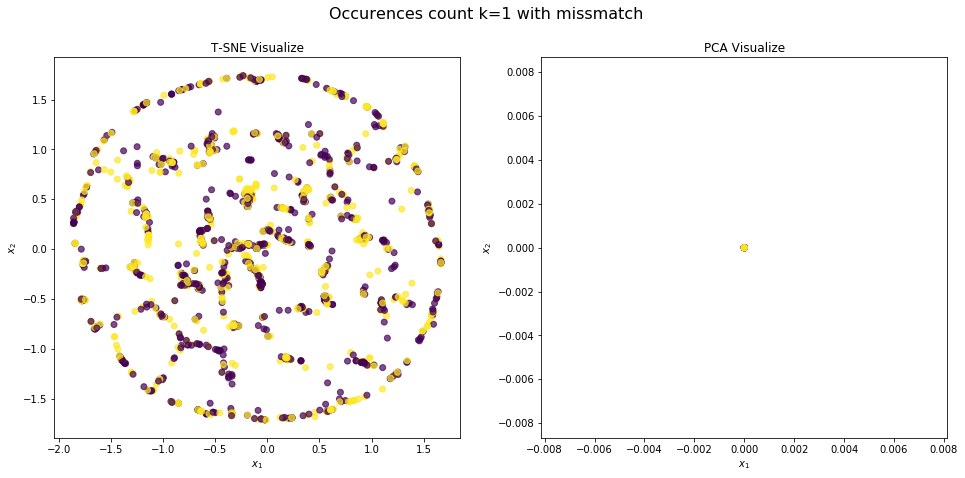

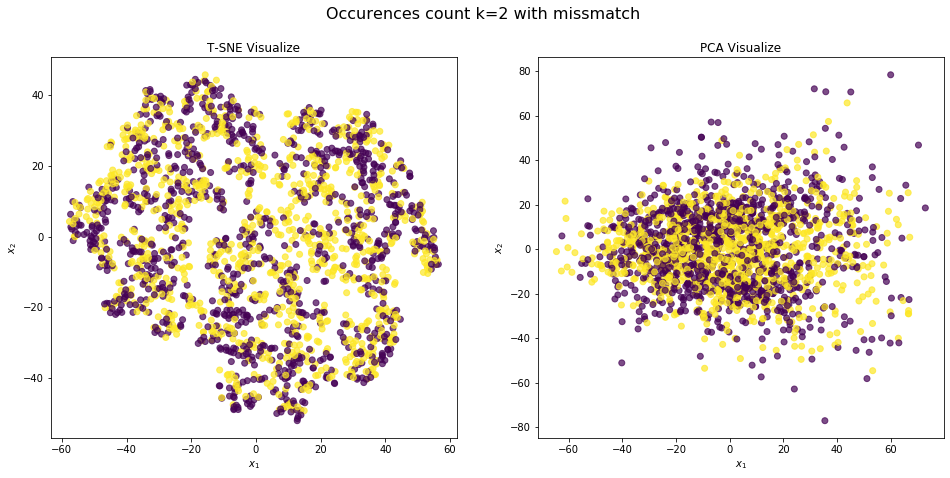

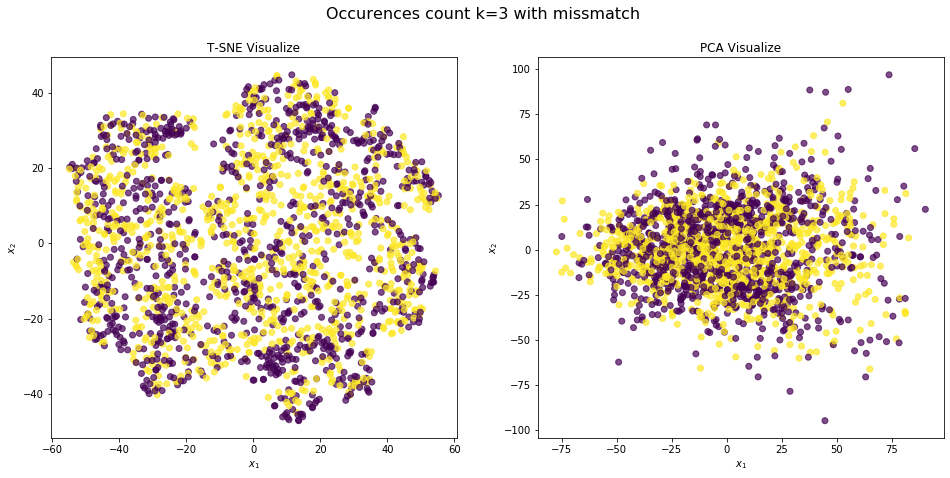

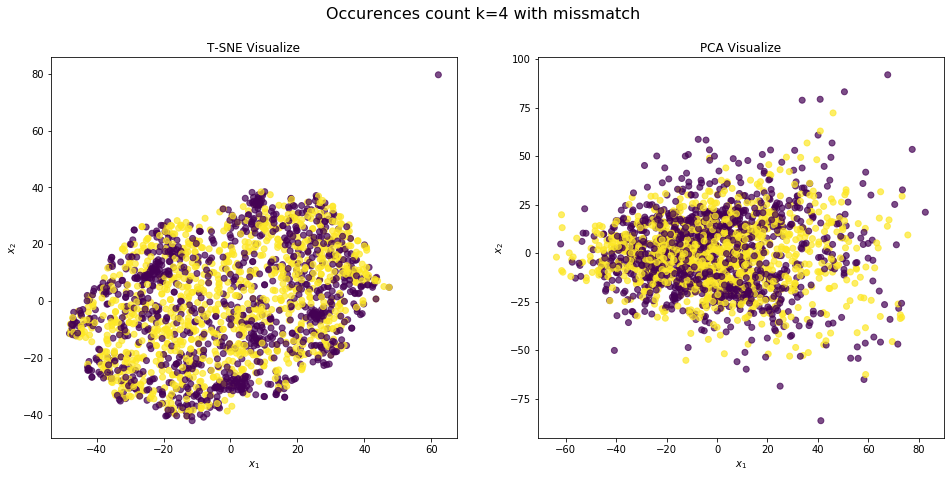

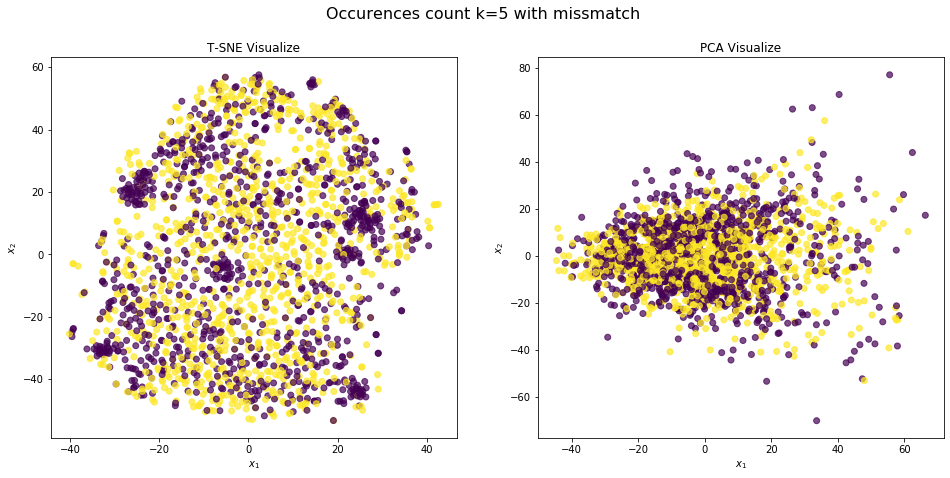

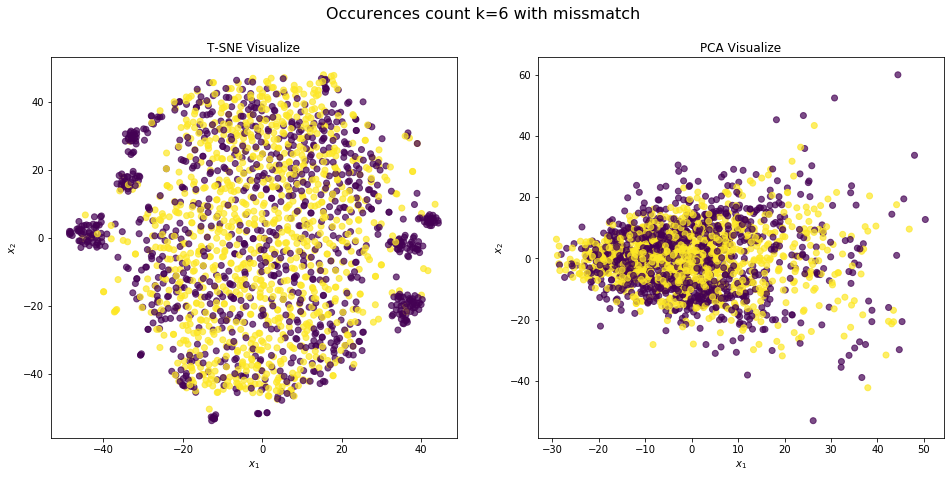

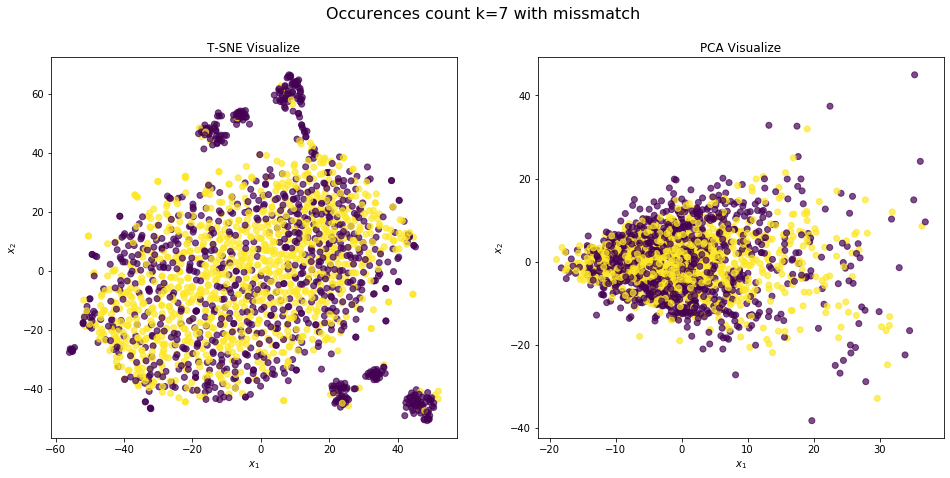

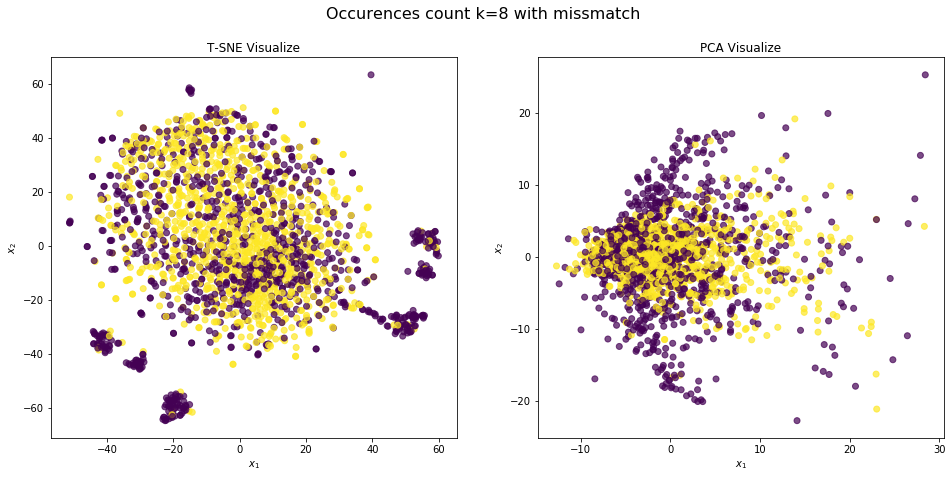

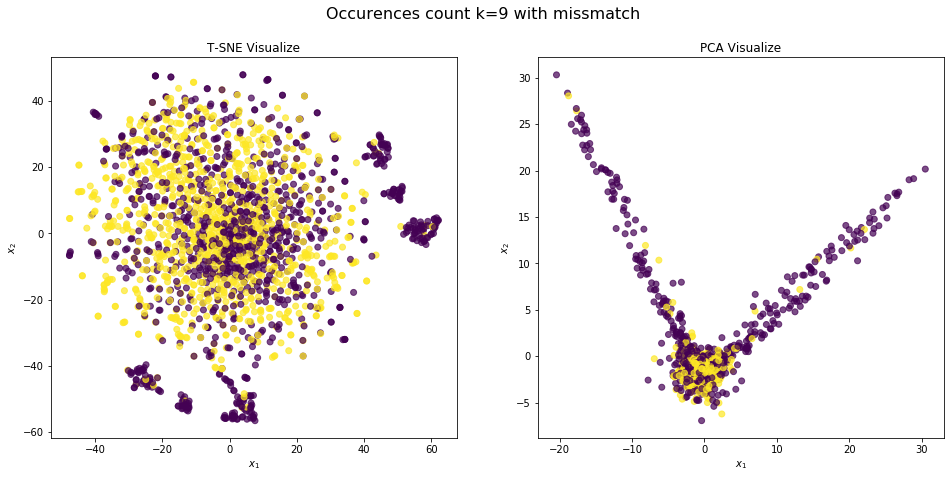

In [57]:
for k in range(1,10):
    Xtr_occurences = encode_data(Xtr.seq, encoder=count_occurences, word_len_list=[k], sparse=True, verbose=0, missmatch=1)
    Xtr_occurences = dim_reduction(Xtr_occurences)
    if isinstance(Xtr_occurences, sp.spmatrix):
        Xtr_occurences = Xtr_occurences.toarray()
    visualize_data(Xtr_occurences, Ytr.Bound, f'Occurences count k={k} with missmatch')

#### Generated count_occurences  for word lenght of: [10]
shape: (2000, 1048576)  size: 5640654
max: 16.0, mean: 0.002719879150390434
zeros: 0, non zeros: 5640654,
ratio: 1.0


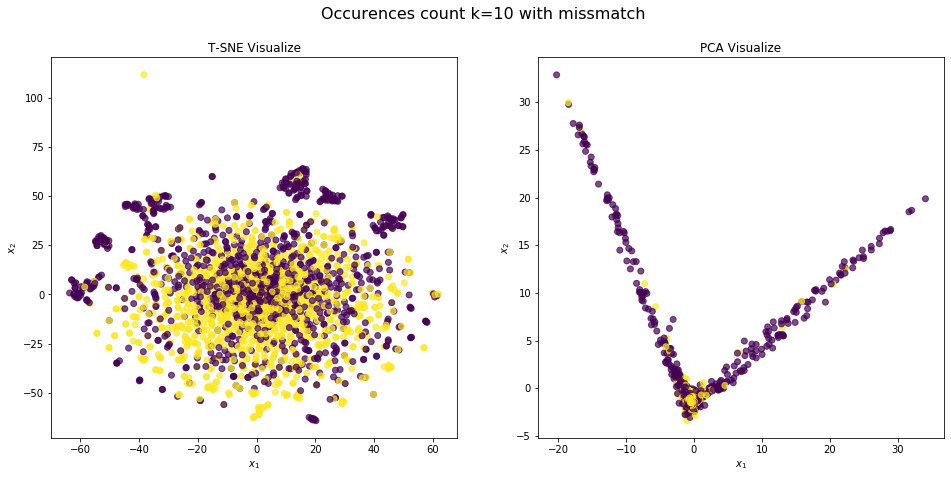

#### Generated count_occurences  for word lenght of: [11]
shape: (2000, 4194304)  size: 6143520
max: 15.0, mean: 0.0007376670837401801
zeros: 0, non zeros: 6143520,
ratio: 1.0


MemoryError: Unable to allocate array with shape (4194304, 400) and data type float64

In [59]:
for k in range(10,18):
    Xtr_occurences = encode_data(Xtr.seq, encoder=count_occurences, word_len_list=[k], sparse=True, verbose=1, missmatch=1)
    Xtr_occurences = dim_reduction(Xtr_occurences)
    if isinstance(Xtr_occurences, sp.spmatrix):
        Xtr_occurences = Xtr_occurences.toarray()
    visualize_data(Xtr_occurences, Ytr.Bound, f'Occurences count k={k} with missmatch')